In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import os
import glob

In [3]:
cwd = os.getcwd()

# Part 1

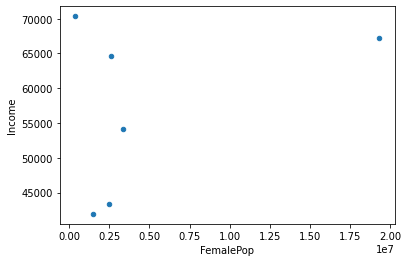

In [4]:
# Q 1 
# The first visualization your boss wants you to make 
# is a scatterplot that shows average income in a state vs proportion of women in that state.

# reading csv
df1 = pd.read_csv('states0.csv', index_col=0)

# splitting male and female populations
df1[['MalePop', 'FemalePop']] = df1['GenderPop'].str.split('_', 1, expand=True)

# cleaning
df1['MalePop'] = df1['MalePop'].str.replace('M', '')
df1['FemalePop'] = df1['FemalePop'].str.replace('F', '')
df1['Income'] = df1['Income'].str.replace('$', '', regex=False)

# changing data type
df1[['Income', 'MalePop', 'FemalePop']] = df1[['Income','MalePop','FemalePop']].apply(pd.to_numeric)

# scatter plot
state_women_plot = df1.plot.scatter('FemalePop', 'Income')

In [5]:
# Q 2
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
all_files = glob.glob(os.path.join(cwd + "/*.csv"))
li = []

all_df = (pd.read_csv(f) for f in all_files if not 'inventory.csv' in f)

us_census = pd.concat(all_df, ignore_index=True)
us_census.drop('Unnamed: 0', 1,inplace=True)

display(us_census)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [6]:
# Q 3
# Look at the .columns and the .dtypes of the us_census DataFrame. 
# Are those datatypes going to hinder you as you try to make histograms?

print(us_census.columns)
print(us_census.dtypes)


Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


In [7]:
# Q 4
# Look at the .head() of the DataFrame so that you can understand why some of 
# these dtypes are objects instead of integers or floats.
display(us_census.head())

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [8]:
# Q 5
# Use regex to turn the Income column into a format that is ready for conversion into a numerical type.
us_census['Income'].replace('\$', '', regex=True, inplace=True)

us_census['Income'] = us_census['Income'].apply(pd.to_numeric)

In [9]:
# Q 6
# Look at the GenderPop column. We are going to want to separate this into two columns, 
# the Men column, and the Women column.

#Split the column into those two new columns using str.split and separating out those results.

us_census[['MalePop', 'FemalePop']] =us_census['GenderPop'].str.split('_', 1, expand=True)

display(us_census)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607M,1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413M,478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674M,340810F


In [10]:
# Q 7
# Convert both of the columns into numerical datatypes.
# There is still an M or an F character in each entry! We should remove those before we convert.

# cleaning
us_census['MalePop'] = us_census['MalePop'].str.replace('M', '')
us_census['FemalePop'] = us_census['FemalePop'].str.replace('F', '')
# us_census['Income'] = us_census['Income'].str.replace('$', '', regex=False)

us_census[['MalePop', 'FemalePop']] = us_census[['MalePop', 'FemalePop']].apply(pd.to_numeric)

display(us_census)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0


In [11]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
MalePop        int64
FemalePop    float64
dtype: object

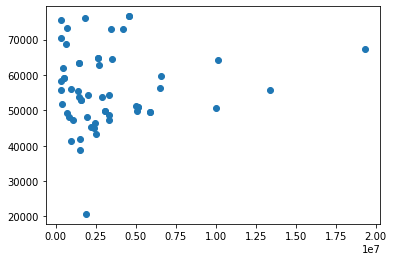

In [12]:
# Q 8
# average income in a state vs proportion of women in that state.

# BY CONVENTION, GRAPHS ARE TITLED LIKE """  Y VS X AXES   """

## SO INCOME SHOULD BE Y, FEMALEPOP BE X
%matplotlib inline
plt.scatter(us_census['FemalePop'], us_census['Income'])
plt.show()

In [13]:
# Q 9
# Did you get an error? These monstrous csv files probably have nan values in them! 
# Print out your column with the number of women per state to see.

# We can fill in those nans by using pandas’ .fillna() function.

# You have the TotalPop per state, and you have the Men per state.
# As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

# Print out the Women column after filling the nan values to see if it worked!

us_census['FemalePop'].isnull().sum() # 3 nans
us_census['FemalePop'].fillna(us_census['TotalPop'] - us_census['MalePop'], inplace=True)
us_census['FemalePop'].isnull().sum() # 0 nans
print(us_census['FemalePop'])

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [14]:
# Q 10
# We forgot to check for duplicates! Use .duplicated() on your census 
# DataFrame to see if we have duplicate rows in there.

us_census.duplicated() # 9 duplicates
us_census.iloc[12] == us_census.iloc[11] # True


State        True
TotalPop     True
Hispanic     True
White        True
Black        True
Native       True
Asian        True
Pacific      True
Income       True
GenderPop    True
MalePop      True
FemalePop    True
dtype: bool

In [15]:
# Q 11

# drop duplicates
us_census.drop_duplicates(inplace=True)

# us_census.duplicated().sum() # 0

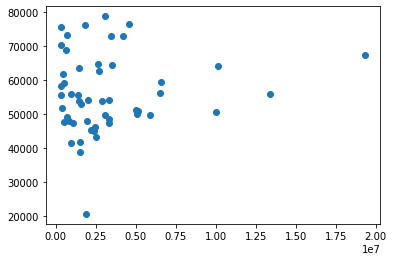

In [16]:
# Q 12
# scatter plot again
plt.scatter(us_census['FemalePop'], us_census['Income'])
plt.show()

In [17]:
# Q 13 14
# 13.
# Now, your boss wants you to make a bunch of histograms out of the race data 
# that you have. Look at the .columns again to see what the race categories are.

# 14.
# Try to make a histogram for each one!

# You will have to get the columns into numerical format, and those percentage signs will have to go.

# Don’t forget to fill the nan values with something that makes sense! 
# You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for
# duplicates again.

cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in cols:
    us_census[col] = us_census[col].str.replace('%', '')
    

In [18]:
us_census[cols] = us_census[cols].apply(pd.to_numeric)
# for col in cols:
#     us_census[col].fillna(np.mean(col))

# HARDCODED SOLUTION ===> WILL CHANGE LATER
us_census[cols].isnull().sum() # pacific has 4 nulls

# fillna
fill_values = 100 - us_census['Hispanic'] - us_census['Black'] - us_census['White'] - us_census['Asian'] - us_census['Native']
us_census['Pacific'].fillna(fill_values, inplace=True)

In [19]:
us_census.duplicated().sum() # 0
cols

['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

array([[<AxesSubplot:title={'center':'Hispanic'}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'Native'}>],
       [<AxesSubplot:title={'center':'Asian'}>,
        <AxesSubplot:title={'center':'Pacific'}>]], dtype=object)

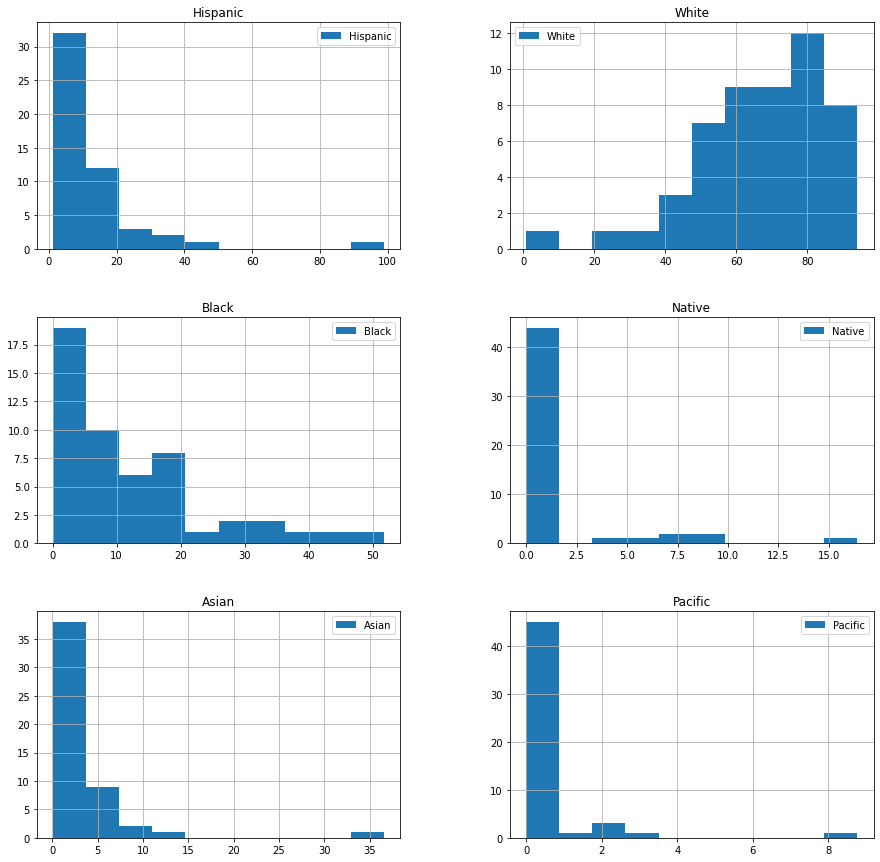

In [20]:
race_df = us_census[cols]

race_df.hist(legend=True, figsize=(15,15))


# Part 2

In [21]:
inventory = pd.read_csv('inventory.csv')

In [22]:
inventory.head()

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99


In [23]:
staten_island = inventory.iloc[:10]


In [24]:
product_request = staten_island['product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [25]:
filt = (inventory['location'] == 'Brooklyn') & (inventory['product_type']) == 'seeds'

seed_request = inventory[filt]

In [26]:
# Add a column to inventory called in_stock which is True if quantity
# is greater than 0 and False if quantity equals 0.

conditions = [inventory['quantity'] > 0, inventory['quantity'] == 0]
choices = [1, False]
inventory['in_stock'] = np.select(conditions, choices, default=np.nan)

# inventory['in_stock'].isnull().sum()

In [27]:
inventory['total_value'] = inventory['price'] * inventory['quantity']

In [28]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

In [29]:
inventory['full_description'] = inventory[['product_type', 'product_description']].apply(combine_lambda, 1) 
# axis 1 BECAUSE WE NEED TO APPLY FUNVYION TO EACH R.O.W.